#### Importing necessary libraries for retrieving stock data


1. yfinance is a popular library to fetch stock data directly from Yahoo Finance

In [55]:
import yfinance as yf

#### Downloading Apple stock data for 2023 and 2024 using yfinance


In [56]:
aapl_df = yf.download('AAPL', start='2023-01-01', end='2023-12-31', progress=False)

In [57]:
future_df = yf.download('AAPL', start='2024-01-01', end='2024-12-31', progress=False)

In [58]:
aapl_df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.768456,129.537780,122.877820,128.924237,112117500
2023-01-04,125.045044,127.321112,123.778365,125.569527,89113600
2023-01-05,123.718979,126.440361,123.461690,125.807022,80962700
2023-01-06,128.271103,128.934129,123.590330,124.698677,87754700
2023-01-09,128.795578,132.021662,128.538289,129.112255,70790800
...,...,...,...,...,...
2023-12-22,192.656174,194.457347,192.029240,194.228458,37122800
2023-12-26,192.108871,192.944773,191.889943,192.666139,28919300


In [59]:
future_df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.734985,187.521338,182.993517,186.237618,82488700
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500
2024-01-04,181.023178,182.197418,179.998201,181.261998,71983600
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500
...,...,...,...,...,...
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700


#### Importing the pandas library for data manipulation and analysis


In [60]:
import pandas as pd

In [61]:
aapl_df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [62]:
aapl_df.isnull().values.any() #no missing values

np.False_

#### Calculating Moving Averages (SMA_20 and SMA_50) for the Apple stock data


1. SMA_20: Represents the 20-day average of the closing prices. It smooths out short-term fluctuations and shows the trend over the last 20 days.
2. SMA_50: Represents the 50-day average of the closing prices. It gives a longer-term view of the trend compared to the 20-day SMA.

In [63]:
aapl_df['SMA_20'] = aapl_df['Close'].rolling(window=20).mean()
aapl_df['SMA_50'] = aapl_df['Close'].rolling(window=50).mean()
aapl_df.dropna(inplace=True) # Drop rows with missing values (NaNs) resulting from the rolling mean calculation


In [64]:
aapl_df

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2023-03-15,151.629074,151.886756,148.586376,149.845083,77167900,148.968451,143.391289
2023-03-16,154.463638,155.068213,150.291082,150.806460,76161100,148.994221,144.005193
2023-03-17,153.621170,155.345697,152.907574,154.691565,98944600,149.058145,144.576715
2023-03-20,155.999817,156.416094,152.778728,153.690557,73641400,149.298486,145.222332
2023-03-21,157.863129,157.982056,155.147497,155.920572,73938300,149.833683,145.814173
...,...,...,...,...,...,...,...
2023-12-22,192.656174,194.457347,192.029240,194.228458,37122800,192.724339,184.403117
2023-12-26,192.108871,192.944773,191.889943,192.666139,28919300,192.886546,184.690417


#### Fitting the linear regression model

In [65]:
y=aapl_df.Close # declaring the dependent variable

In [66]:
y

Ticker,AAPL
Date,
2023-03-15,151.629074
2023-03-16,154.463638
2023-03-17,153.621170
2023-03-20,155.999817
2023-03-21,157.863129
...,...
2023-12-22,192.656174
2023-12-26,192.108871
2023-12-27,192.208359


In [67]:
x=aapl_df.drop(['Close'],axis=1) # declaring the dependent variables

In [68]:
x

Price,High,Low,Open,Volume,SMA_20,SMA_50
Ticker,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,
2023-03-15,151.886756,148.586376,149.845083,77167900,148.968451,143.391289
2023-03-16,155.068213,150.291082,150.806460,76161100,148.994221,144.005193
2023-03-17,155.345697,152.907574,154.691565,98944600,149.058145,144.576715
2023-03-20,156.416094,152.778728,153.690557,73641400,149.298486,145.222332
2023-03-21,157.982056,155.147497,155.920572,73938300,149.833683,145.814173
...,...,...,...,...,...,...
2023-12-22,194.457347,192.029240,194.228458,37122800,192.724339,184.403117
2023-12-26,192.944773,191.889943,192.666139,28919300,192.886546,184.690417


##### Importing train_test_split from sklearn to split data into training and testing sets


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #(80% training, 20% testing)

In [71]:
x_train.shape, y_train.shape

((160, 6), (160, 1))

In [72]:
x_test.shape, y_test.shape

((41, 6), (41, 1))

##### Importing libraries for linear regression model and evaluation metrics

1. Importing Linear Regression from scikit-learn
2. Importing evaluation metrics: Mean Squared Error (MSE) and R² score


In [73]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
model=linear_model.LinearRegression()

In [75]:
model.fit(x_train,y_train)

LinearRegression()

In [76]:
y_pred=model.predict(x_test)

In [77]:
y_pred.shape

(41, 1)

In [78]:
y_test.shape

(41, 1)

##### Output the model's coefficients, intercept, and evaluation metrics

1. Print the coefficients of the model (i.e., how much each feature contributes to the prediction)
2. Print the intercept of the model (i.e., the point where the line crosses the y-axis)
3. Print the Mean Squared Error (MSE) to evaluate how well the model's predictions fit the data
4. Print the R² score to evaluate how well the model explains the variance in the target variable

In [79]:
print('Coefficients', model.coef_)
print('intercept:', model.intercept_)
print('mean_squared_error: %.2f'% mean_squared_error(y_test,y_pred))
print('R^2 %.2f'%r2_score(y_test,y_pred))

Coefficients [[ 7.52099832e-01  8.64912456e-01 -6.25915525e-01 -5.56874891e-09
   1.07333899e-03  2.13248179e-03]]
intercept: [1.52334473]
mean_squared_error: 0.70
R^2 0.99


#### Importing seaborn for advanced visualization

In [80]:
import seaborn as sns

In [81]:
y_test

Ticker,AAPL
Date,
2023-05-10,172.016098
2023-08-11,176.690460
2023-08-31,186.708130
2023-11-27,188.864731
2023-11-14,186.526215
2023-07-03,191.011795
2023-06-15,184.610336
2023-09-01,188.288315
2023-04-11,159.369614


In [82]:
y_pred

array([[171.49049554],
       [176.79656979],
       [187.43473932],
       [188.86663052],
       [185.97456561],
       [190.87026262],
       [184.41926806],
       [187.77838348],
       [159.65700164],
       [173.94505919],
       [171.8554649 ],
       [189.65954367],
       [182.07821591],
       [174.42413277],
       [178.3497041 ],
       [191.24289116],
       [184.45689437],
       [178.82078383],
       [176.52061943],
       [171.50169786],
       [176.83708623],
       [164.39216435],
       [178.82866192],
       [166.21601652],
       [176.66335909],
       [163.33479044],
       [150.51713625],
       [191.06078265],
       [159.50082809],
       [174.88586292],
       [191.63268227],
       [171.82893791],
       [176.96991084],
       [178.35037005],
       [164.51600791],
       [173.16718114],
       [182.26199483],
       [181.60324968],
       [170.66878913],
       [170.43073114],
       [159.49586155]])

In [83]:
y_pred = y_pred.ravel()  # OR y_pred = y_pred.flatten() 
# Flattening the y_pred array to make it 1-dimensional

In [84]:
y_pred

array([171.49049554, 176.79656979, 187.43473932, 188.86663052,
       185.97456561, 190.87026262, 184.41926806, 187.77838348,
       159.65700164, 173.94505919, 171.8554649 , 189.65954367,
       182.07821591, 174.42413277, 178.3497041 , 191.24289116,
       184.45689437, 178.82078383, 176.52061943, 171.50169786,
       176.83708623, 164.39216435, 178.82866192, 166.21601652,
       176.66335909, 163.33479044, 150.51713625, 191.06078265,
       159.50082809, 174.88586292, 191.63268227, 171.82893791,
       176.96991084, 178.35037005, 164.51600791, 173.16718114,
       182.26199483, 181.60324968, 170.66878913, 170.43073114,
       159.49586155])

In [85]:
yy_test=y_test.to_numpy()

In [86]:
yy_test

array([[172.01609802],
       [176.69046021],
       [186.70812988],
       [188.86473083],
       [186.5262146 ],
       [191.01179504],
       [184.6103363 ],
       [188.28831482],
       [159.36961365],
       [174.7525177 ],
       [171.95663452],
       [190.36668396],
       [182.57577515],
       [175.55751038],
       [177.28675842],
       [190.37733459],
       [183.61784363],
       [178.22871399],
       [177.50540161],
       [170.89651489],
       [175.47801208],
       [163.55204773],
       [179.58839417],
       [165.8578949 ],
       [177.86151123],
       [164.08724976],
       [151.6290741 ],
       [192.23822021],
       [159.33987427],
       [176.46188354],
       [191.59138489],
       [171.68830872],
       [178.25074768],
       [176.48197937],
       [164.69181824],
       [173.73278809],
       [180.62059021],
       [181.77882385],
       [170.26907349],
       [171.39057922],
       [158.67582703]])

In [87]:
yy_test=yy_test.ravel()

In [88]:
yy_test

array([172.01609802, 176.69046021, 186.70812988, 188.86473083,
       186.5262146 , 191.01179504, 184.6103363 , 188.28831482,
       159.36961365, 174.7525177 , 171.95663452, 190.36668396,
       182.57577515, 175.55751038, 177.28675842, 190.37733459,
       183.61784363, 178.22871399, 177.50540161, 170.89651489,
       175.47801208, 163.55204773, 179.58839417, 165.8578949 ,
       177.86151123, 164.08724976, 151.6290741 , 192.23822021,
       159.33987427, 176.46188354, 191.59138489, 171.68830872,
       178.25074768, 176.48197937, 164.69181824, 173.73278809,
       180.62059021, 181.77882385, 170.26907349, 171.39057922,
       158.67582703])

<Axes: >

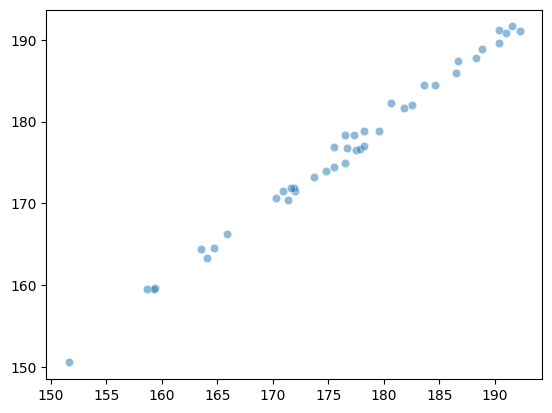

In [89]:
sns.scatterplot(x=yy_test,y=y_pred,alpha=0.5)
# Create a scatter plot to visualize the relationship between actual and predicted values

#### Making predictions for future data (Apple stock prices for 2024)

In [90]:
future_df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [91]:
future_df['SMA_20'] = future_df['Close'].rolling(window=20).mean()
future_df['SMA_50'] = future_df['Close'].rolling(window=50).mean()
future_df.dropna(inplace=True)

In [92]:
future_df_inputs=future_df.drop(['Close'],axis=1)

In [93]:
future_predictions=model.predict(future_df_inputs)
print(future_predictions)

[[171.00848039]
 [172.75733523]
 [170.78669066]
 [174.89630095]
 [174.52982815]
 [176.99770894]
 [171.32626345]
 [170.82014919]
 [170.29726999]
 [170.35647372]
 [172.17427502]
 [170.62558154]
 [169.45969354]
 [168.24855791]
 [169.74330153]
 [169.90928353]
 [169.37516673]
 [168.24535113]
 [169.17631893]
 [167.26171042]
 [172.99642368]
 [176.63270591]
 [173.33222838]
 [169.78560787]
 [168.6827002 ]
 [166.95396245]
 [164.14313235]
 [165.92074831]
 [165.98960023]
 [168.0516674 ]
 [168.82681268]
 [170.07432441]
 [174.66044964]
 [171.24649559]
 [171.19567404]
 [171.19015671]
 [182.30801341]
 [181.4331411 ]
 [182.05508636]
 [181.35030938]
 [183.27028974]
 [182.38558164]
 [185.58792029]
 [186.74778962]
 [189.09517764]
 [189.91020949]
 [189.94450317]
 [190.72826206]
 [191.89886346]
 [190.71317189]
 [186.92237643]
 [189.25667299]
 [190.2201105 ]
 [191.19509568]
 [191.41013048]
 [190.51801808]
 [193.81578207]
 [193.43303911]
 [195.69648461]
 [194.68511467]
 [195.57417694]
 [192.4774521 ]
 [202.76

In [94]:
mse = mean_squared_error(future_df['Close'], future_predictions)
r2 = r2_score(future_df['Close'], future_predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.397078881086186
R-squared: 0.9978102069330497


In [95]:
future_predictions=future_predictions.ravel()

In [96]:
future_test_Data=future_df['Close']

In [97]:
future_test_Data

Ticker,AAPL
Date,
2024-03-13,170.513031
2024-03-14,172.376282
2024-03-15,171.997635
2024-03-18,173.093689
2024-03-19,175.445175
...,...
2024-12-23,255.270004
2024-12-24,258.200012
2024-12-26,259.019989


In [98]:
future_test_Data=future_test_Data.to_numpy()

In [99]:
future_test_Data

array([[170.51303101],
       [172.37628174],
       [171.99763489],
       [173.09368896],
       [175.44517517],
       [178.02583313],
       [170.75213623],
       [171.65887451],
       [170.23403931],
       [169.09814453],
       [172.68516541],
       [170.86175537],
       [169.41697693],
       [168.23127747],
       [169.03834534],
       [168.21134949],
       [168.96861267],
       [167.84268188],
       [169.05828857],
       [167.17510986],
       [174.40892029],
       [175.91348267],
       [172.06738281],
       [168.76934814],
       [167.39430237],
       [166.43774414],
       [164.40512085],
       [165.24209595],
       [166.29826355],
       [168.41064453],
       [169.27749634],
       [168.68962097],
       [172.87446594],
       [169.71591187],
       [168.68962097],
       [172.40617371],
       [182.71884155],
       [181.05488586],
       [181.74238586],
       [182.0811615 ],
       [183.90458679],
       [182.63743591],
       [185.86013794],
       [187

In [100]:
future_test_Data=future_test_Data.ravel()

In [101]:
future_test_Data

array([170.51303101, 172.37628174, 171.99763489, 173.09368896,
       175.44517517, 178.02583313, 170.75213623, 171.65887451,
       170.23403931, 169.09814453, 172.68516541, 170.86175537,
       169.41697693, 168.23127747, 169.03834534, 168.21134949,
       168.96861267, 167.84268188, 169.05828857, 167.17510986,
       174.40892029, 175.91348267, 172.06738281, 168.76934814,
       167.39430237, 166.43774414, 164.40512085, 165.24209595,
       166.29826355, 168.41064453, 169.27749634, 168.68962097,
       172.87446594, 169.71591187, 168.68962097, 172.40617371,
       182.71884155, 181.05488586, 181.74238586, 182.0811615 ,
       183.90458679, 182.63743591, 185.86013794, 187.0075531 ,
       189.29240417, 189.41212463, 189.44204712, 190.60942078,
       191.91647339, 190.46972656, 186.45880127, 189.55180359,
       189.56178284, 189.8611145 , 190.8588562 , 191.81668091,
       193.59268188, 193.91195679, 195.42852783, 194.04167175,
       196.44622803, 192.6847229 , 206.68310547, 212.58

##### Create a scatter plot to visualize the relationship between actual and predicted values
##### Add a dashed line representing a perfect fit (where actual = predicted)


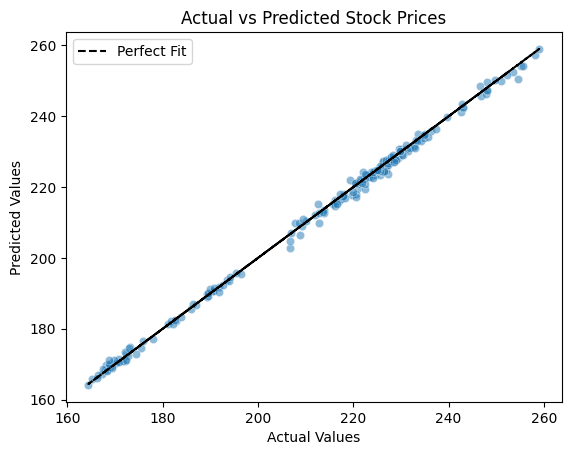

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x=future_test_Data, y=future_predictions, alpha=0.5)

plt.plot(future_test_Data, future_test_Data, color='black', linestyle='dashed', label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()

plt.show()
